In [213]:
# @author : Kalyan Ghosh 

# Task 1 -- Basic Statistical Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import pylab as pl
from scipy import stats
from scipy.optimize import curve_fit
from sklearn import linear_model
import statsmodels.api as sm
from numpy.linalg import inv
import statsmodels.formula.api as smf
import pylab
from scipy.stats import chisquare
from statsmodels.graphics.gofplots import qqplot
from pandas.tools.plotting import autocorrelation_plot

data_folder = Path("C:/Users/Kalyan/Desktop/NCSU/3rd Semester/IOT Analytics 592/Project2/data/")
file_to_open = data_folder / "kghosh.csv"


class Basic_Statistical_Analysis:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    
    def hist_mean_variance(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)

        df = pd.DataFrame(data)
        
        X1 = df.iloc[:,0]
        X2 = df.iloc[:,1]
        X3 = df.iloc[:,2]
        X4 = df.iloc[:,3]
        X5 = df.iloc[:,4]
        Y  = df.iloc[:,5]
        
        #plot histograms
        
        
        X=df.iloc[:,[0,1,2,3,4]]
        #X.hist()
        
        #pl.suptitle("Histogram of variables X1,X2,X3,X4,X5")
        
        #1.1
        #calculate the mean
        
        print ("Mean of X1= ",X1.mean())
        print ("Mean of X2= ",X2.mean())
        print ("Mean of X3= ",X3.mean())
        print ("Mean of X4= ",X4.mean())
        print ("Mean of X5= ",X5.mean())
        
        #calculate the variance
        print ("***************************************")
        
        print ("Variance of X1= ",X1.var(axis=0))
        print ("Variance of X2= ",X2.var(axis=0))
        print ("Variance of X3= ",X3.var(axis=0))
        print ("Variance of X4= ",X4.var(axis=0))
        print ("Variance of X5= ",X5.var(axis=0))
        
        print ("***************************************")
        
        #1.2
        #create boxplots
        X1=pd.DataFrame(X1)
        X2=pd.DataFrame(X2)
        X3=pd.DataFrame(X3)
        X4=pd.DataFrame(X4)
        X5=pd.DataFrame(X5)

        #pl.suptitle("Box Plot of X1,X2,X3,X4,X5")
        #X.boxplot()
        Y=pd.DataFrame(Y)
        #Y.boxplot()
        #pl.suptitle("Box Plot of Y")
        
        # Removing the outliers
        
        
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1 #interquartile range for the values of all the variables
        
        Q1X=X.quantile(0.25)
        Q3X=X.quantile(0.75)
        IQRX=Q3X-Q1X
        
        Q1Y=Y.quantile(0.25)
        Q3Y=Y.quantile(0.75)
        IQRY=Q3Y-Q1Y
        
        #print ("Interquartile Ranges")
        #print(IQR)
        
        print ("***************************************")
        print ("Removing outliers")
        
        #print (df.shape)
        df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
        X = X[~((X < (Q1X - 1.5 * IQRX)) |(X > (Q3X + 1.5 * IQRX))).any(axis=1)]
        Y = Y[~((Y < (Q1Y - 1.5 * IQRY)) |(Y > (Q3Y + 1.5 * IQRY))).any(axis=1)]
        print (df.shape)
        #X.boxplot()
        #Y.boxplot()
        #plt.suptitle("X1,X2,X3,X4,X5 after outlier removal")
        #plt.suptitle("Y after outlier removal")
        print ("***************************************")
        
        #1.3
        #create correlation matrix
        print ("Correlation Matrix for X1, X2, X3, X4, X5 & Y:")
        print ("***************************************")
        print(df.corr())
        
       
obj=Basic_Statistical_Analysis(file_to_open)
obj.hist_mean_variance()
        
        

Mean of X1=  40.371115600000024
Mean of X2=  97.83115999999994
Mean of X3=  150.10245333333322
Mean of X4=  234.0766333333334
Mean of X5=  270.21036666666674
***************************************
Variance of X1=  317.1666478839704
Variance of X2=  313.77130760642143
Variance of X3=  284.50412926537336
Variance of X4=  316.84342842697873
Variance of X5=  278.6509614035675
***************************************
***************************************
Removing outliers
(287, 6)
***************************************
Correlation Matrix for X1, X2, X3, X4, X5 & Y:
***************************************
          0         1         2         3         4         5
0  1.000000 -0.082011  0.049790 -0.048844  0.052768  0.962989
1 -0.082011  1.000000  0.034109  0.024464 -0.007425 -0.053154
2  0.049790  0.034109  1.000000  0.003841 -0.086675  0.062881
3 -0.048844  0.024464  0.003841  1.000000 -0.036171  0.000613
4  0.052768 -0.007425 -0.086675 -0.036171  1.000000  0.129794
5  0.962989 -0.053

Manual R squared =  0.9273470887966728


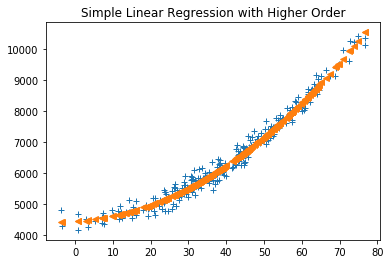

In [215]:
# Task 2 -- Simple Linear Regression

# Model the dataset with a simple linear regression model Y=a0+a1X1+epsilon

class Simple_Linear_Regression:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    def linear_regression(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)
        df = pd.DataFrame(data)
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1 #interquartile range for the values of all the variables
        
        #print ("Interquartile Ranges")
        #print(IQR)
        
        #print ("***************************************")
        #print ("Removing outliers")
        
        #print (df.shape)
        df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
        #print (df.shape)
        
        X1 = df.iloc[:,0]
        Y  = df.iloc[:,5]
        
        ##################################################################

        
        
        
        
        ##################################################################
        
        #2.1 Determine the estimates of a0, a1, sigma^2
        
        meanX1=X1.mean()
        meanY=Y.mean()
        #print (meanX1,meanY)
        
        X1_i_minus_meanX1=X1.subtract(meanX1)
        Y_i_minus_meanY=Y.subtract(meanY)
        X1_i_minus_meanX1_squared=X1_i_minus_meanX1**2
        numerator=sum(X1_i_minus_meanX1*Y_i_minus_meanY)
        denominator=sum(X1_i_minus_meanX1_squared)
        a1=(numerator/denominator)
        a0=(meanY-a1*meanX1)
        
        Y_i=a0+(a1*X1)
        e_i=pd.DataFrame(Y-Y_i)
        error_variance=e_i.var()
        #print ("a0=",a0,"a1=",a1,"Error Variance=",error_variance)
        
        
        #***************************************************************#
        
        #2.2 Check the p-values, R**2, and F value to determine if the regression coefficients are significant
        
        ssreg = np.sum((Y_i-meanY)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        sstot = np.sum((Y - meanY)**2)    # or sum([ (yi - ybar)**2 for yi in y])
        R_squared = ssreg / sstot
        
        print ("Manual R squared = ",R_squared)
        
        #X1=sm.add_constant(X1)
        #reg = linear_model.LinearRegression()
        #clf=reg.fit(X1, Y)
        #prediction=clf.predict(X1)
        #print(model.summary())
        #model = sm.OLS(Y, X1).fit()
        #res=model.resid
        #plt.scatter(prediction,res)
        #plt.title('Scatter plot of Residuals for Linear Order Model')
        
        #***************************************************************#
        
        #2.3 Plotting a Simple Linear Regression Model
        
        #plt.plot(X1,Y,'+')
        #plt.plot(X1,Y_i, '<')
        #plt.title("Simple Linear Regression")
        
        #***************************************************************#
        
        #2.4 i > Draw histogram of the residuals
        #e_i.hist()
        #plt.title("Histogram Of Residuals for Linear Model")
        
        #***************************************************************#
        
        #2.4 Q-Q plots 
       
        #res = model.resid # residuals
        #print (res)
        #fig = sm.qqplot(res,stats.distributions.norm)
        #stats.probplot(res, dist="norm", plot=pylab)
        #pylab.show()
        #plt.title("QQ Plot of Residuals for Linear Model")
        #Histogram of residuals
        #residuals = sorted(model.resid) # Just in case it isn't sorted
        #normal_distribution = stats.norm.pdf(residuals, np.mean(residuals), np.std(residuals))
        #plt.plot(residuals, normal_distribution)
        #plt.show
        #plt.title("Normal Curve of Residuals for Linear Model")
        
        # plot the scatterplot of residuals
        #prediction=clf.predict(X1_new)
        #plt.scatter(Y_i,res)
        #plt.title('Scatter plot of Residuals for Linear Model')
        ######################################################################
        # Performing the Chi-Squared Test
        #normal_distribution = stats.norm.pdf(res, np.mean(residuals), np.std(residuals))
        #res = stats.norm.rvs(size = 100)
        #print (stats.normaltest(res))
        ######################################################################
        
        X1_squared=X1**2
        X1_new=sm.add_constant(X1)
        X1_new[1]=X1_squared
        
        
        
       
        #print (X1_new.shape,X1_squared.shape)
        model = sm.OLS(Y, X1_new).fit()
        
        reg = linear_model.LinearRegression()
        clf=reg.fit(X1_new, Y)
        prediction=clf.predict(X1_new)

        #visualize results
        
        plt.plot(X1,Y,'+')
        plt.plot(X1,prediction, '<')
        plt.title("Simple Linear Regression with Higher Order")
        ########################################################################
        # Recheck the values
        model = sm.OLS(Y, X1_new).fit()
        #print (model.summary())
        res = model.resid # residuals
        #fig = sm.qqplot(res,stats.distributions.norm)
        #stats.probplot(res, dist="norm", plot=pylab)
        #pylab.show()
        #plt.title("QQ Plot of Residuals for Linear Model")
        #res.hist()
        #plt.scatter(res,prediction)
        #plt.title('Scatter plot of Residuals for Higher Order Model')
        
        #res = stats.norm.rvs(size = 100)
        #print (stats.normaltest(res))
        
        
        
        #****************************************************************#
        
        #2.7 > Use a higher-order polynomial regression, i.e., Y = a0 + a1X + a2X2 + ε, to see if it gives better results
        
        # a2=(Sx^2y)(Sxx)-(Sxy)(Sxx^2)/((Sxx)(Sx^2x^2)-(Sxx^2)^2)
        '''
        Sxx=np.mean((X1_i_minus_meanX1)**2)
        Sxy=np.mean((X1_i_minus_meanX1)*(Y_i_minus_meanY))
        
        X1_squared=X1**2;
        X1_squared_mean=np.mean(X1_squared)
        X1_squared_minus_mean_X1_squared=X1_squared.subtract(X1_squared_mean)

        Sxx2=np.mean((X1_i_minus_meanX1)*(X1_squared_minus_mean_X1_squared))
        
        Sx2x2=np.mean(X1_squared_minus_mean_X1_squared**2)
        
        Sx2y=np.mean((X1_squared_minus_mean_X1_squared)*Y_i_minus_meanY)
        
        a2=((Sx2y*Sxx)-(Sxy*Sxx2))/((Sxx*Sx2x2)-((Sxx2)**2))
        
        #print ("a2 coeffecient=",a2)
        '''
        #Y_i_high_order=a0+X1.multiply(a1)+(X1**2).multiply(a2)
        #print (Y_i_high_order)
        #fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        #ax.plot(X1,Y, 'o')
        #ax.plot(X1,Y_i_high_order, '<')
        #plt.title("Linear regression with higher order")
        
        

        
obj=Simple_Linear_Regression(file_to_open)
obj.linear_regression()

In [217]:
# Task 3 -- Linear Multivariate Regression

# Model the dataset multivariable regression on all the independent variables, and determine the values
# for all the coefficients, and σ2
# beta=(X'X)^-1(X'Y)


class Multivariate_Linear_Regression:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    def linear_multivariate_regression(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)
        df = pd.DataFrame(data)
        
        
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1 #interquartile range for the values of all the variables
        
        #print ("Interquartile Ranges")
        #print(IQR)
        
        #print ("***************************************")
        #print ("Removing outliers")
        
        #print (df.shape)
        df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
        #print (df.shape)
        
        X=df.iloc[:,[0,1,2,3,4]]
        X=sm.add_constant(X)
        X1 = df.iloc[:,0]
        X2 = df.iloc[:,1]
        X3 = df.iloc[:,2]
        X4 = df.iloc[:,3]
        X5 = df.iloc[:,4]
        Y = df.iloc[:,5]
        
        # 3.1
        #clf = linear_model.LinearRegression(fit_intercept=True)
        #clf.fit(X,Y)
        #beta=clf.coef_
        #beta_intercept=clf.intercept_
        #print ("Intercept=",beta_intercept,"Coeffecients=",beta)
        
        #clf1=sm.OLS(Y,X)
        #clf2=clf1.fit(fit_intercept=True)
        #print (clf2.summary())
        ##############################################################
        X_new=df.iloc[:,[0,3,4]]
        clf1=sm.OLS(Y,X_new)
        clf2=clf1.fit()
        prediction=clf2.predict(X_new)
        model = sm.OLS(Y, X_new).fit()
        print(model.summary())
        #res = model.resid # residuals

        
        #variance:
        #e_i=pd.DataFrame(Y-prediction)
        #error_variance=e_i.var()
        #print (error_variance)
     
        #fig = sm.qqplot(res,stats.distributions.norm)
        #stats.probplot(res, dist="norm", plot=pylab)
        #pylab.show()
        #print (clf2.summary())
        #res.hist()
        
        #autocorrelation_plot(res)
        #plt.show()
        
        #fig, ax = plt.subplots(figsize=(6,2.5))
        #_ = ax.scatter(prediction,res)
        #plt.title('Scatter plot of Residuals for Higher Order Model after removal of variable')
        
         # Performing the Chi-Squared Test
        #normal_distribution = stats.norm.pdf(res, np.mean(residuals), np.std(residuals))
        #res = stats.norm.rvs(size = 100)
        #print (stats.normaltest(res))
        
        ##############################################################
        

        #print('Coeffecients: \n', beta)
        #Y_hat=beta_intercept+beta[0]*X1+beta[1]*X2+beta[2]*X3+beta[3]*X4+beta[4]*X5
        #e_i=pd.DataFrame(Y_hat-Y)
        #error_variance=e_i.var()
        #print ("Error Varaince = ",error_variance)
        #e_i_squared=(e_i**2)
        #e_i_squared_sum=(e_i_squared.sum())
        #n=e_i_squared.count()
        #print (e_i_squared_sum/(n-1))
        
        #3.2 calculate the p values, R^2, F value and the correlation matrix
        #print (df.corr())
        # going by the p -values we can treat these params as non zero
        # since the R squared values is also close to 1, we can assume that the fit is good
        # since F is also very high, we reject the Null Hypothesis
        # Based on the correlation matrix also we cannot remove other papameters
        
        #3.3 Q-Q plots 
       
        #res = clf2.resid # residuals
        #fig = sm.qqplot(res,stats.distributions.norm)
        #plt.show()
        #plt.title("Q-Q Plot of Residuals")

        #Histogram of residuals
        #res.hist()
        #plt.title("Histogram of Residuals")
        #residuals = sorted(clf2.resid) # Just in case it isn't sorted
        #normal_distribution = stats.norm.pdf(residuals, np.mean(residuals), np.std(residuals))
        #plt.plot(residuals, normal_distribution)
        #plt.show
        #plt.title("Residuals against a Normal Curve")
        
        #performing a chi-squared test
        #z,pval = stats.normaltest(residuals)
        
        print ("*****************************************************************")
        #print ("Z value=",z,"P value=",pval)
        print ("*****************************************************************")
        
        # plot the scatterplot of residuals
        #plt.scatter(residuals,Y_hat)
        #plt.title('Scatter plot of Residuals')
        
        
        


obj=Multivariate_Linear_Regression(file_to_open)
obj.linear_multivariate_regression()

                            OLS Regression Results                            
Dep. Variable:                      5   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.352e+04
Date:                Sun, 28 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:29:28   Log-Likelihood:                -2091.6
No. Observations:                 287   AIC:                             4189.
Df Residuals:                     284   BIC:                             4200.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             80.2690      1.249     64.244      0.0